In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD, NMF, PCA
from sklearn.cluster import KMeans
from bokeh.palettes import Category20
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')

In [59]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 2.2 MB/s 
     |████████████████████████████████| 1.1 MB 33.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=b0e32ebd3f2e27d17236d74ac925991352dc0417dc2bc8cfd44380cc1d8e46fa
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55509 sha256=e900ddcdf566694c24a01293abb8016bc590197182e829edc15761d912c09e08
  Stored in directory: /root/.cache/pip/wheels/19/bc/eb/974072a56a7082a302f8b4be1ad6d21bf5019235c2eff65928
Successfully built umap-learn pynndescent


In [60]:
import umap.umap_ as umap

In [61]:
import umap

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd '/content/drive/My Drive/Colab Notebooks/[2022.1] PLN'

/content/drive/My Drive/Colab Notebooks/[2022.1] PLN


In [6]:
!pwd
!ls

/content/drive/My Drive/Colab Notebooks/[2022.1] PLN
classificador.ipynb  imdb-reviews-pt-br.csv  test_data.txt
description.txt      test_data_solution.txt  train_data.txt


## Questão 1

Escolha 10 documentos da base, e determine seu documento mais parecido (que não pode ser ele mesmo), usando:

a) Representação vetorial CountVectorizer com similaridade do cosseno;

b) Representação vetorial TF-IDF com similaridade do cosseno.

Mostre pelo menos um trecho de cada par de documentos parecidos que justifique essa semelhança.

In [7]:
df = pd.read_csv('train_data.txt', sep =':::', header = None, engine = 'python', nrows = 6000)
df.columns = ['id', 'title', 'genre', 'description']
df2 = pd.read_csv('test_data_solution.txt', sep =':::', header = None, engine = 'python', nrows = 6000)
df2.columns = ['id', 'title', 'genre', 'description']

In [8]:
df3 = pd.concat([df, df2], ignore_index=True)
df3.drop('id', axis=1, inplace=True)
comedy = df3.loc[df3['genre'].str.contains('comedy')]
drama = df3.loc[df3['genre'].str.contains('drama')]
dataset = pd.concat([comedy, drama], ignore_index=True)

In [9]:
def preprocess(description):
  description = re.sub(r'\w*\d\w*', '', description) 
  description = re.sub(r'[^a-zA-Z ]', '', description.lower())
  return re.sub(r'\s+', ' ', description)

In [10]:
dataset['description'] = dataset.description.apply(preprocess)

In [11]:
stop_words = set(nltk.corpus.stopwords.words('english'))
def remove_stopwords(description):
    tokenized_text = nltk.word_tokenize(description, language='english')
    return " ".join([token for token in tokenized_text if token not in stop_words])

In [12]:
dataset['description'] = dataset.description.apply(remove_stopwords)

In [13]:
dataset

,title,genre,description
0,"""Pink Slip"" (2009)",comedy,tough economic times max joey run ideas discov...
1,Babylon Vista (2001),comedy,frankie reno child star tv show thirty years a...
2,Söderpojkar (1941),comedy,gang unemployed itinerant musicians play south...
3,Tunnel Vision (1976),comedy,committee investigating tvs first uncensored n...
4,"""The Young Professionals"" (2015)",comedy,whether blocking mouse holes running landlords...
...,...,...,...
4664,Hello & Goodbye (????),drama,wounds still open recent end year relationship...
4665,Nyab Siab Zoo (2009),drama,death lady va chas husband two sons returns no...
4666,Saving the Lives of Children (2008),drama,series monologues tell tales underground schoo...
4667,Charachar (1994),drama,lakha comes family bird catchers questions val...


In [14]:
tfidf_X = TfidfVectorizer().fit_transform(dataset.description)
count_X = CountVectorizer().fit_transform(dataset.description)

tfidf_similarity_matrix = cosine_similarity(tfidf_X)
count_similarity_matrix = cosine_similarity(count_X)

In [15]:
np.fill_diagonal(tfidf_similarity_matrix, 0.0)
np.fill_diagonal(count_similarity_matrix, 0.0)

result = [
    {
        'doc': dataset.iloc[i],
        'tfidf_similar_doc': dataset.iloc[tfidf_similarity_matrix[i, :].argmax()],
        'tfidf_similarity': tfidf_similarity_matrix[i, :].max(),
        'count_similar_doc': dataset.iloc[count_similarity_matrix[i, :].argmax()],
        'count_similarity': count_similarity_matrix[i, :].max(),
    }
    for i in [random.randint(0, len(dataset)) for _ in range(10)]
]

In [16]:
%%html
<style>
    .col {
        height: 100%;
        padding-left: 16px;
        padding-right: 16px;
        padding-top: 8px;
        padding-bottom: 8px;
    }
style>

### 1.a) Representação vetorial CountVectorizer com similaridade do cosseno;

### 1.b) Representação vetorial TF-IDF com similaridade do cosseno.

In [18]:
for r in result:
    title = r['doc'].title if r['doc'].title != '' else r['doc'].description[:150] + '...'
    movie = '<span>%(title)s</span> <span>%(description)s</span>' 
    desc_length = 300
    
    tfidf_content = movie % ({
        'title': r['tfidf_similar_doc'].title,
        'description': r['tfidf_similar_doc'].description[:desc_length] + '...',
    })
    count_content = movie % ({ 
        'title': r['count_similar_doc'].title,
        'description': r['count_similar_doc'].description[:desc_length] + '...',
    })
    
    display(HTML('''
    <div style="margin: 8px; border: 1px solid lightgray">
        <div style="text-align: center;background-color: whitesmoke;padding: 8px"><u r['doc'].title >''' + title + '''</u></div>
        <div>
            <div>
                <div class="col">
                <div><strong>TfidfVectorizer: </strong>''' + str(r['tfidf_similarity'])[:6] + '''</div>
                <div>''' + tfidf_content + '''</div>
                </div>
            </div>
            <div>
                <div class="col">
                <div><strong>CountVectorizer: </strong>''' + str(r['count_similarity'])[:6] + '''</div>
                <div>''' + count_content + '''</div>
                </div>
            </div>
        </div>
    </div>
    '''))

## Questão 2

Elabore um problema de classificação binária de textos coerente com sua
base.

a) Determine o rótulo dos documentos (separando os documentos em classes
bem definidas).

b) Extraia as representações vetoriais com CountVectorizer e TF-IDF.

c) Treine um classificador baseado em cada uma das duas representações vetoriais e Regressão Logística usando validação cruzada com 70% das amostras selecionadas para treino e 30% para teste. Exiba as matrizes de confusão,
métricas de acurácia, precisão, recall e F1 score.

d) Faça o mesmo para o classificador Naive-Bayes.

e) Faça o mesmo para um outro classificador de sua preferência (pesquise na
biblioteca Scikit-learn).

f) Compare os 6 resultados.


### 2.a) Determine o rótulo dos documentos (separando os documentos em classes bem definidas).

In [19]:
lbl_to_ind = {
    ' comedy ': 0, ' drama ': 1, 
}
y = [lbl_to_ind[l] for l in dataset.genre.values[:4669]]

### 2.b) Extraia as representações vetoriais com CountVectorizer e TF-IDF.

In [20]:
tfidf_X_train, tfidf_X_test, tfidf_y_train, tfidf_y_test = train_test_split(tfidf_X, y, test_size=0.3)
count_X_train, count_X_test, count_y_train, count_y_test = train_test_split(count_X, y, test_size=0.3)

### 2.c) Treine um classificador baseado em cada uma das duas representações vetoriais e Regressão Logística usando validação cruzada com 70% das amostras selecionadas para treino e 30% para teste. Exiba as matrizes de confusão, métricas de acurácia, precisão, recall e F1 score.

In [21]:
cl = LogisticRegression().fit(tfidf_X_train.toarray(), tfidf_y_train)
tfidf_y_pred = cl.predict(tfidf_X_test.toarray())

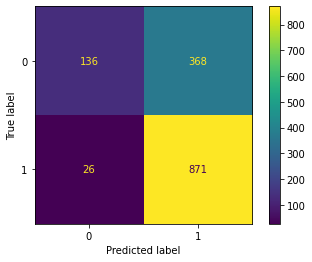

In [22]:
plot_confusion_matrix(cl, tfidf_X_test.toarray(), tfidf_y_test)
plt.show()

In [23]:
accuracy_lr_tfidf = accuracy_score(tfidf_y_test, tfidf_y_pred)
precision_lr_tfidf = precision_score(tfidf_y_test, tfidf_y_pred)
recall_lr_tfidf = recall_score(tfidf_y_test, tfidf_y_pred)
f1_lr_tfidf = f1_score(tfidf_y_test, tfidf_y_pred)

print("Regressão Logísitca e TF-IDF\nAcurácia: {}\nPrecisão: {}\nRecall: {}\nF1 Score: {}\n".format(accuracy_lr_tfidf, precision_lr_tfidf, recall_lr_tfidf, f1_lr_tfidf))

Regressão Logísitca e TF-IDF
Acurácia: 0.7187723054960742
Precisão: 0.7029862792574657
Recall: 0.9710144927536232
F1 Score: 0.8155430711610487



In [24]:
cl = LogisticRegression().fit(count_X_train.toarray(), count_y_train)
count_y_pred = cl.predict(count_X_test.toarray())

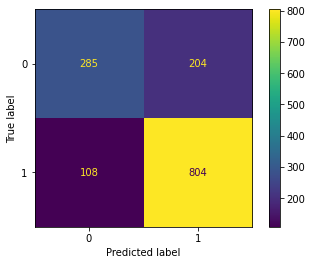

In [25]:
plot_confusion_matrix(cl, count_X_test.toarray(), count_y_test)
plt.show()

In [26]:
accuracy_lr_count = accuracy_score(count_y_test, count_y_pred)
precision_lr_count = precision_score(count_y_test, count_y_pred)
recall_lr_count = recall_score(count_y_test, count_y_pred)
f1_lr_count = f1_score(count_y_test, count_y_pred)

print("Regressão Logísitca e CountVectorizer\nAcurácia: {}\nPrecisão: {}\nRecall: {}\nF1 Score: {}\n".format(accuracy_lr_count, precision_lr_count, recall_lr_count, f1_lr_count))

Regressão Logísitca e CountVectorizer
Acurácia: 0.7773019271948608
Precisão: 0.7976190476190477
Recall: 0.881578947368421
F1 Score: 0.8375



### 2.d) Faça o mesmo para o classificador Naive-Bayes.




In [27]:
cl_nb = MultinomialNB().fit(tfidf_X_train.toarray(), tfidf_y_train)
tfidf_y_pred_nb = cl_nb.predict(tfidf_X_test.toarray())

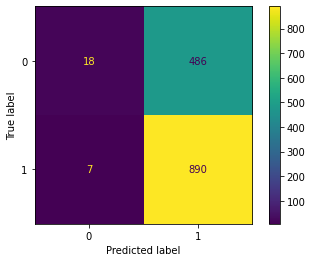

In [28]:
plot_confusion_matrix(cl_nb, tfidf_X_test.toarray(), tfidf_y_test)
plt.show()

In [29]:
accuracy_nb_tfidf = accuracy_score(tfidf_y_test, tfidf_y_pred_nb)
precision_nb_tfidf = precision_score(tfidf_y_test, tfidf_y_pred_nb)
recall_nb_tfidf = recall_score(tfidf_y_test, tfidf_y_pred_nb)
f1_nb_tfidf = f1_score(tfidf_y_test, tfidf_y_pred_nb)

print("Naive Bayes e TF-IDF\nAcurácia: {}\nPrecisão: {}\nRecall: {}\nF1 Score: {}\n".format(accuracy_nb_tfidf, precision_nb_tfidf, recall_nb_tfidf, f1_nb_tfidf))

Naive Bayes e TF-IDF
Acurácia: 0.648108493932905
Precisão: 0.6468023255813954
Recall: 0.992196209587514
F1 Score: 0.7831060272767268



In [30]:
cl_nb = MultinomialNB().fit(count_X_train.toarray(), count_y_train)
count_y_pred_nb = cl_nb.predict(count_X_test.toarray())

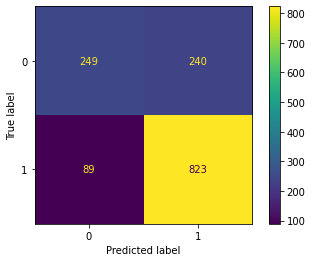

In [31]:
plot_confusion_matrix(cl_nb, count_X_test.toarray(), count_y_test)
plt.show()

In [32]:
accuracy_nb_count = accuracy_score(count_y_test, count_y_pred_nb)
precision_nb_count = precision_score(count_y_test, count_y_pred_nb)
recall_nb_count = recall_score(count_y_test, count_y_pred_nb)
f1_nb_count = f1_score(count_y_test, count_y_pred_nb)

print("Naive Bayes e CountVectorizer\nAcurácia: {}\nPrecisão: {}\nRecall: {}\nF1 Score: {}\n".format(accuracy_nb_count, precision_nb_count, recall_nb_count, f1_nb_count))

Naive Bayes e CountVectorizer
Acurácia: 0.7651677373304783
Precisão: 0.7742238946378175
Recall: 0.9024122807017544
F1 Score: 0.8334177215189873



### 2.e) Faça o mesmo para um outro classificador de sua preferência (pesquise na biblioteca Scikit-learn).

In [33]:
cl_svm = LinearSVC().fit(tfidf_X_train.toarray(), tfidf_y_train)
tfidf_y_pred_svm = cl_svm.predict(tfidf_X_test.toarray())

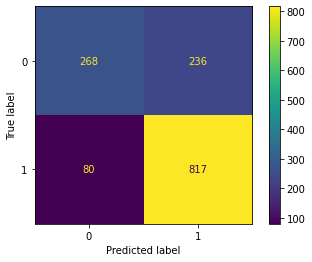

In [34]:
plot_confusion_matrix(cl_svm, tfidf_X_test.toarray(), tfidf_y_test)
plt.show()

In [35]:
accuracy_svm_tfidf = accuracy_score(tfidf_y_test, tfidf_y_pred_svm)
precision_svm_tfidf = precision_score(tfidf_y_test, tfidf_y_pred_svm)
recall_svm_tfidf = recall_score(tfidf_y_test, tfidf_y_pred_svm)
f1_svm_tfidf = f1_score(tfidf_y_test, tfidf_y_pred_svm)

print("SVM e TF-IDF\nAcurácia: {}\nPrecisão: {}\nRecall: {}\nF1 Score: {}\n".format(accuracy_svm_tfidf, precision_svm_tfidf, recall_svm_tfidf, f1_svm_tfidf))

SVM e TF-IDF
Acurácia: 0.7744468236973591
Precisão: 0.7758784425451092
Recall: 0.9108138238573021
F1 Score: 0.837948717948718



In [36]:
cl_svm = LinearSVC().fit(count_X_train.toarray(), count_y_train)
count_y_pred_svm = cl_svm.predict(count_X_test.toarray())

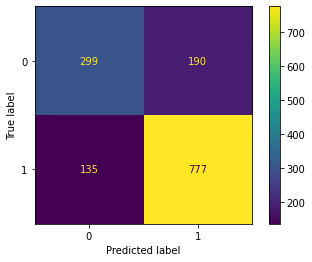

In [37]:
plot_confusion_matrix(cl_svm, count_X_test.toarray(), count_y_test)
plt.show()

In [38]:
accuracy_svm_count = accuracy_score(count_y_test, count_y_pred_svm)
precision_svm_count = precision_score(count_y_test, count_y_pred_svm)
recall_svm_count = recall_score(count_y_test, count_y_pred_svm)
f1_svm_count = f1_score(count_y_test, count_y_pred_svm)

print("SVM e CountVectorizer\nAcurácia: {}\nPrecisão: {}\nRecall: {}\nF1 Score: {}\n".format(accuracy_svm_count, precision_svm_count, recall_svm_count, f1_svm_count))

SVM e CountVectorizer
Acurácia: 0.76802284082798
Precisão: 0.8035160289555325
Recall: 0.8519736842105263
F1 Score: 0.8270356572645023



### 2.f) Compare os 6 resultados

In [39]:
lr_count_results = [accuracy_lr_count, precision_lr_count, recall_lr_count, f1_lr_count]
lr_tfidf_results = [accuracy_lr_tfidf, precision_lr_tfidf, recall_lr_tfidf, f1_lr_tfidf]
nb_count_results = [accuracy_nb_count,precision_nb_count, recall_nb_count,f1_nb_count]
nb_tfidf_results = [accuracy_nb_tfidf, precision_nb_tfidf,recall_nb_tfidf, f1_nb_tfidf]
svm_count_results = [accuracy_svm_count,precision_svm_count, recall_svm_count,f1_svm_count]
svm_tfidf_results = [accuracy_svm_tfidf,precision_svm_tfidf, recall_svm_tfidf,f1_svm_tfidf]

data_results2 = {
    'Regression with Count': lr_count_results,
    'Regression with TF-IDF': lr_tfidf_results,
    'Naive Bayes with Count': nb_count_results,
    'Naive Bayes with TF-IDF': nb_tfidf_results,
    'SVM with Count': svm_count_results,
    'SVM with TF-IDF': svm_tfidf_results,
}

index_values2 = ['accuracy', 'precision', 'recall', 'f1']
pd.set_option('display.max_columns', None)

df_results2 = pd.DataFrame(data_results2, index=index_values2)

df_results2

,Regression with Count,Regression with TF-IDF,Naive Bayes with Count,Naive Bayes with TF-IDF,SVM with Count,SVM with TF-IDF
accuracy,0.777302,0.718772,0.765168,0.648108,0.768023,0.774447
precision,0.797619,0.702986,0.774224,0.646802,0.803516,0.775878
recall,0.881579,0.971014,0.902412,0.992196,0.851974,0.910814
f1,0.837500,0.815543,0.833418,0.783106,0.827036,0.837949


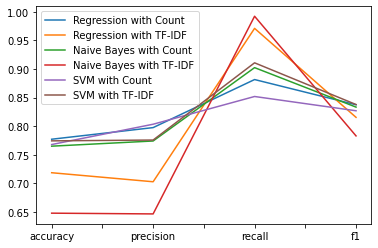

In [40]:
df_results2.plot()
plt.show()

Podemos analisar que obtivemos a maior acurácia quando utilizamos o Naive Bayes com CountVectorizer, precisão mais alta utilizando Regressão Logística com CountVectorizer, maior recall utilizando Naive Bayes com TF-IDF e maior F1 utilizando Naive Bayes com CountVectorizer.

## Questão 3

Realize um comparativo entre os métodos LDA, SVD e NMF para realizar
modelagem de tópicos. Para cada método:

a) empiricamente, tente identificar uma quantidade de tópicos adequada para
seu problema. Exiba resultados que justifiquem a quantidade de tópicos
escolhida;

b) identifique as 5 palavras mais relevantes de cada tópico;

c) identifique os 3 tópicos mais relevantes de 5 documentos quaisquer (você
pode representar os tópicos por suas 5 palavras mais relevantes).

d) qual método apresentou melhores resultados, na sua opinião? Justifique com resultados/dados.

In [41]:
n_topics = 5
samples = dataset.sample(n=5)
samples.reset_index(inplace=True)
samples

,index,title,genre,description
0,4243,"""Storyland"" (2009)",drama,comedy drama set present day kilkenny fragment...
1,3161,Taming Jessica Lang (2007),drama,world crazy place jessica life normal life mot...
2,1390,America 101 (2005),comedy,two brothers leave home mexico search american...
3,3479,A Soul Enslaved (1916),drama,tired poverty jane finally accepts advances am...
4,665,Straight Wedding (????),comedy,unique wedding comprised couple assume opposit...


Utilizando TF-IDF como embbeding dos textos

In [47]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(dataset.description)

In [51]:
for decomposition_algorithm in (LatentDirichletAllocation, TruncatedSVD, NMF):
    algorithm = decomposition_algorithm(n_components=n_topics)
    X_topics = algorithm.fit_transform(X)

    def get_top_words(topic, n, words, algorithm):
      sorted_idxs = np.argsort(algorithm.components_[topic])
      top_words = [words[i] for i in sorted_idxs]
      return [w for w in reversed(top_words[-n:])]

    print(f'Algoritmo: {decomposition_algorithm.__name__}')
    for i in range(n_topics):
        print(f'Tópico {i + i} -> {get_top_words(i, 5, tfidf.get_feature_names(), algorithm)}')
    print('\n')

    sample_topics = algorithm.transform(tfidf.transform(samples.description))

    for i, sample in samples.iterrows():
        print(f'{sample.title}')
        print(sample.description[:70] + '...')
        print(sample_topics[i])
        print('\n')

Algoritmo: LatentDirichletAllocation
Tópico 0 -> ['life', 'one', 'young', 'love', 'man']
Tópico 2 -> ['life', 'love', 'young', 'family', 'mother']
Tópico 4 -> ['life', 'one', 'family', 'man', 'two']
Tópico 6 -> ['life', 'one', 'family', 'young', 'love']
Tópico 8 -> ['life', 'young', 'one', 'two', 'love']


 "Storyland" (2009) 
comedy drama set present day kilkenny fragmented group old school frie...
[0.03083705 0.03067279 0.03100208 0.03084844 0.87663964]


 Taming Jessica Lang (2007) 
world crazy place jessica life normal life mother father best give eve...
[0.03194358 0.03187942 0.03213984 0.03208448 0.87195268]


 America 101 (2005) 
two brothers leave home mexico search american dream realize front tim...
[0.02265112 0.02262731 0.76935505 0.02278856 0.16257797]


 A Soul Enslaved (1916) 
tired poverty jane finally accepts advances ambrose wealthy owner fact...
[0.88559219 0.02843098 0.02893264 0.02846815 0.02857604]


 Straight Wedding (????) 
unique wedding comprised couple assume

Melhor algoritmo: NMF

## Questão 4
Realize um agrupamento dos dados seguindo os seguintes passos:

a) Aplique o algoritmo PCA, preservando 95% da variância nos dados. Qual a
dimensão resultante dos dados projetados?

b) Aplique um algoritmo k-means nos dados projetados, usando o método elbow
para encontrar o valor de k ótimo.

In [62]:
stemmer = nltk.stem.RSLPStemmer()
dataset['stemmed_text'] = dataset.description.apply(lambda tokens: ' '.join([stemmer.stem(token) for token in tokens.split(' ')]))
X = tfidf.fit_transform(dataset.stemmed_text)

In [63]:
Xproj = PCA(n_components=.95).fit_transform(X.toarray())

In [65]:
Xproj.shape[1]

3799

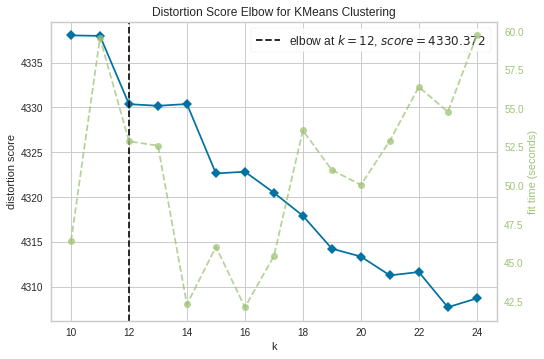

In [66]:
visualizer = KElbowVisualizer(KMeans(), k=(10, 25), metric='distortion')
visualizer.fit(Xproj)
visualizer.show()

In [73]:
k = 13
kmeans_proj = KMeans(n_clusters=k).fit(Xproj)

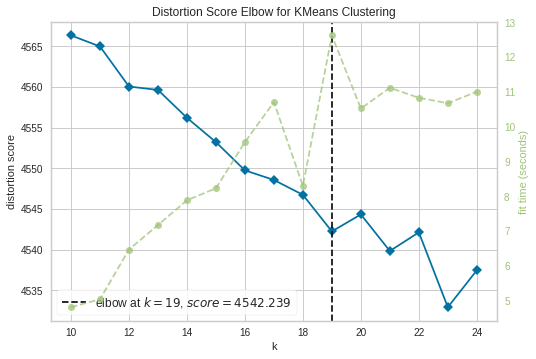

In [74]:
visualizer = KElbowVisualizer(KMeans(), k=(10, 25), metric='distortion')
visualizer.fit(X)
visualizer.show()

In [75]:
k = 11
kmeans = KMeans(n_clusters=k).fit(X)

## Questão 5
Nesta questão você deve aplicar métodos de projeção multidimensional para visualizar os dados da segunda questão no espaço visual.

a) aplique os métodos de projeção multidimensional t-SNE e UMAP nos dados resultantes da questão 2b, e plote os gráficos das projeções resultantes, codificando as cores dos pontos de acordo com os grupos obtidos pelo k-means.

b) Experimente variar os hiperparâmetros perplexity do t-SNE e n neighbors
do UMAP. O que acontece com as projeções quando estes parâmetros são
calibrados para valores menores ou maiores do que seus valores padrão?

c) Usando os melhores valores encontrados para perplexity e n neighbors,
compare o tempo de execução e a qualidade visual da projeção dos 2 métodos
de projeção multidimensional (t-SNE e UMAP). Qual abordagem se saiu
melhor em cada um desses aspectos?

In [64]:
start = time.time()
X_tsne = TSNE(n_components = 2).fit_transform(Xproj)
duration = time.time() - start

In [67]:
print('%s segundos' %duration)

62.183706521987915 segundos


In [77]:
palette = Category20[k]

In [78]:
def scatter_plot(X, labels):
  scatter_plot = figure(plot_width = 1000, plot_height = 500)
  scatter_plot.circle(X[:, 0], X[:, 1], size = 10, line_color=[palette[l] for l in labels], 
                      fill_color=[palette[l] for l in labels], fill_alpha=.8)
  show(scatter_plot)

In [79]:
scatter_plot(X_tsne, kmeans.labels_)

In [82]:
start = time.time()
X_umap = umap.UMAP().fit_transform(Xproj)
duration = time.time() - start

In [84]:
print('%s segundos' %duration)

43.59550905227661 segundos


In [85]:
scatter_plot(X_umap, kmeans.labels_)

O melhor método de projeção multidimensional foi o TSNE.

Usando o TSNE nos dados não projetados:

In [86]:
start = time.time()
X_tsne = TSNE(n_components = 2).fit_transform(X)
duration = time.time() - start

In [87]:
print('%s segundos' %duration)

40.47003531455994 segundos


In [92]:
scatter_plot(X_tsne, kmeans.labels_)

In [89]:
dataset['label'] = kmeans.labels_

In [90]:
def cluster_topic(dataset, cluster_label, n_words):
  X = tfidf.fit_transform(dataset[dataset['label'] == cluster_label].processed_description)
  nmf = NMF(n_components=1)
  X_topics = nmf.fit_transform(X)
  return get_top_words(0, n_words, tfidf.get_feature_names(), nmf)

In [91]:
n_words = 10
display(HTML('<h2>Top {} palavras de cada grupo</h2>'.format(n_words)))
for label, color in enumerate(palette):
  display(HTML('<h3><span style="color:{}"><strong>Grupo {}: {}</strong></span></h3>'.format(color, label, ', '.join(cluster_topic(dataset, label, n_words)))))